In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer

from sklearn import metrics
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier


In [2]:
import nltk
import string
import re
import nltk.stem as ns
ps = ns.PorterStemmer()
lemma = ns.WordNetLemmatizer()
from nltk.tokenize import word_tokenize, sent_tokenize
def remove_punctuation(x):
    punctuation = string.punctuation
    no_punct = "".join([word for word in x if word not in punctuation])
    return no_punct

def remove_stopwords(x):
    stopwords = nltk.corpus.stopwords.words('english')
    no_sw = [word for word in x if word not in stopwords]
    return no_sw

#function built to use either stemming or lematization
def lemmatize(x):
    lemmatized = [lemma.lemmatize(word) for word in x]
    return lemmatized


#all of those functions inside one function to keep code clean
def clean_data(x):
    #tokens = re.sub("[^a-zA-Z]", " ", x.lower())
    essay_v = re.sub("[^a-zA-Z0-9]+", " ", x)
    tokens = essay_v.lower().split()
    no_sw = remove_stopwords(tokens)
    #root = lemmatize(no_sw)
    cleaned = ' '.join(no_sw)
    return cleaned

def clean_tokenize(x):
    #tokens = re.sub("[^a-zA-Z]", " ", x.lower())
    essay_v = re.sub("[^a-zA-Z]", " ", x)
    tokens = essay_v.lower().split()
    no_sw = remove_stopwords(tokens)
    root = lemmatize(no_sw)
    return root


In [3]:
df = pd.read_pickle('English_Headlines_EngFeatures.pkl')

In [4]:
df

,Statement,Rating,cleaned,cleaned tokenized,tokens,statement length,word count,sentence count,unique words,lexical richness,...,numerical%,sexual anatomy / sexual acts,bodily fluids / excrement,sexual orientation / gender,racial / ethnic slurs,animal references,internet slang,profanity_level,bigrams,trigrams
0,Changing our clocks is a health hazard. Just a...,1,changing clocks health hazard ask sleep doctor,"[changing, clock, health, hazard, ., ask, slee...","[Changing, our, clocks, is, a, health, hazard,...",13,46,2,11,40.32,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.012298,"[changing clocks, clocks health, health hazard...","[changing clocks health, clocks health hazard,..."
1,How the Alec Baldwin fatal film set shooting u...,1,alec baldwin fatal film set shooting unfolded,"[alec, baldwin, fatal, film, set, shooting, un...","[How, the, Alec, Baldwin, fatal, film, set, sh...",9,45,1,9,9.00,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.025994,"[alec baldwin, baldwin fatal, fatal film, film...","[alec baldwin fatal, baldwin fatal film, fatal..."
2,A 90-year-old tortoise named Mr. Pickles just ...,1,90 year old tortoise named mr pickles became f...,"[90-year-old, tortoise, named, mr., pickle, be...","[A, 90-year-old, tortoise, named, Mr., Pickles...",19,62,2,17,35.84,...,0.052632,0.0,0.0,0.0,0.0,0.0,0.000000,0.031957,"[90 year, year old, old tortoise, tortoise nam...","[90 year old, year old tortoise, old tortoise ..."
3,Alabama governor ousts a top education officia...,1,alabama governor ousts top education official ...,"[alabama, governor, ousts, top, education, off...","[Alabama, governor, ousts, a, top, education, ...",17,69,1,14,63.00,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.010403,"[alabama governor, governor ousts, ousts top, ...","[alabama governor ousts, governor ousts top, o..."
4,"2 people are dead, 20 missing, as a migrant bo...",1,2 people dead 20 missing migrant boat sinks co...,"[2, people, dead, ,, 20, missing, ,, migrant, ...","[2, people, are, dead, ,, 20, missing, ,, as, ...",18,57,1,16,14.00,...,0.111111,0.0,0.0,0.0,0.0,0.0,0.000000,0.065102,"[2 people, people dead, dead 20, 20 missing, m...","[2 people dead, people dead 20, dead 20 missin..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6543,Health Ranger Report: Gregory Mannarino dubs c...,0,health ranger report gregory mannarino dubs ce...,"[health, ranger, report, :, gregory, mannarino...","[Health, Ranger, Report, :, Gregory, Mannarino...",17,108,1,15,71.68,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.121624,"[health ranger, ranger report, report gregory,...","[health ranger report, ranger report gregory, ..."
6544,Trans Activist Threatens Women Who Try To Stop...,0,trans activist threatens women try stop using ...,"[trans, activist, threatens, woman, try, stop,...","[Trans, Activist, Threatens, Women, Who, Try, ...",14,55,1,14,12.00,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.071429,0.120767,"[trans activist, activist threatens, threatens...","[trans activist threatens, activist threatens ..."
6545,Justin Trudeau Announces $5.5 Million To ‘Cens...,0,justin trudeau announces 5 5 million censor in...,"[justin, trudeau, announces, $, 5.5, million, ...","[Justin, Trudeau, Announces, $, 5.5, Million, ...",12,61,1,12,8.00,...,0.083333,0.0,0.0,0.0,0.0,0.0,0.083333,0.196001,"[justin trudeau, trudeau announces, announces ...","[justin trudeau announces, trudeau announces 5..."
6546,Rasmussen final Generic Congressional Ballot: ...,0,rasmussen final generic congressional ballot 4...,"[rasmussen, final, generic, congressional, bal...","[Rasmussen, final, Generic, Congressional, Bal...",19,84,1,14,33.88,...,0.111111,0.0,0.0,0.0,0.0,0.0,0.000000,0.192476,"[rasmussen final, final generic, generic congr...","[rasmussen final generic, final generic congre..."


In [5]:
cols = [col for col in df.columns.values if col != 'Rating' and col != 'bigrams' and 
        col != 'trigrams' and col != 'cleaned' 
        and col != 'cleaned tokenized' and col != 'tokens']

In [6]:
x_df = df[cols]
y = df['Rating'].values

In [7]:
sentences = df['Statement'].values

In [8]:
sentences

array(['Changing our clocks is a health hazard. Just ask a sleep doctor',
       'How the Alec Baldwin fatal film set shooting unfolded',
       "A 90-year-old tortoise named Mr. Pickles just became a father of 3. It's a big 'dill'",
       ...,
       'Justin Trudeau Announces $5.5 Million To ‘Censor Independent Media’',
       'Rasmussen final Generic Congressional Ballot: 48% GOP 43% DEM – GOP +13 with  independent voters',
       'Kevin McCarthy caves (as expected), appoints Ilhan Omar to House Foreign Affairs Committee'],
      dtype=object)

In [9]:
y

array([1, 1, 1, ..., 0, 0, 0])

In [11]:
vectorizer = TfidfVectorizer(analyzer=clean_tokenize)
tfidf_vecs = vectorizer.fit_transform(sentences).toarray()
#X = pd.concat([pd.DataFrame(tfidf_vecs), x_df], axis = 1)

In [14]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import LabelBinarizer
from sklearn.linear_model import LinearRegression
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split, GridSearchCV
import joblib

from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier

In [15]:
ct = ColumnTransformer([('standard_scaler', StandardScaler(), [col for col in x_df if col != 'Statement'])])



In [16]:
transformed_feat = ct.fit_transform(x_df)

In [17]:
transformed_feat.shape

(6548, 46)

In [18]:
tfidf_vecs.shape

(6548, 9863)

In [19]:
import numpy as np
X = np.concatenate((tfidf_vecs, transformed_feat), axis=1)

In [20]:
X.shape

(6548, 9909)

In [21]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, f1_score

clfXGB = Pipeline(steps = [('XGBoost', XGBClassifier())])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=49)

In [22]:
X_train.shape

(5238, 9909)

In [23]:
#SVM
clfSVM = Pipeline(steps = [('SVM', SVC())])
#logistic regression
clfLOGREG = Pipeline(steps = [('Logistic Regression', LogisticRegression())])
#XGBoost
clfXGB = Pipeline(steps = [('XGBoost', XGBClassifier())])
#XGBoost with tuned params
clfXGB_best =  Pipeline(steps = [('XGBoost_tuned', XGBClassifier(colsample_bytree= 0.5,
                                                            gamma=0.3,
                                                            learning_rate=0.1,
                                                            max_depth=6,
                                                            min_child_weight=1))])

#Naive Bayes
clfNB = Pipeline(steps = [('Naive Bayes', GaussianNB())])
#Random forest
clfRFC = Pipeline(steps = [('RFC', RandomForestClassifier())])
#neural netTODO

In [24]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, f1_score
models = [clfSVM, clfLOGREG, clfXGB, clfXGB_best, clfNB, clfRFC]

model_scores={}
model_rand_acc = {}


    
for idx, model in enumerate(models):
    model.fit(X_train, y_train)
    name = list(model.named_steps)[0]
    
    score = model.score(X_test, y_test)
    y_pred = model.predict(X_test)
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    
    
    model_scores[name] = score, mae, mse, f1


    #joblib.dump(model, f'headline_classifiers_english/{name}Classifier.joblib')
    print(f'model {idx+1} done')

model 1 done


c:\Users\cvaal\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


model 2 done
model 3 done
model 4 done
model 5 done
model 6 done


In [25]:
model_scores

{'SVM': (0.8450381679389313,
  0.1549618320610687,
  0.1549618320610687,
  0.8512820512820513),
 'Logistic Regression': (0.8801526717557252,
  0.11984732824427481,
  0.11984732824427481,
  0.8813303099017384),
 'XGBoost': (0.8793893129770992,
  0.12061068702290076,
  0.12061068702290076,
  0.8810240963855421),
 'XGBoost_tuned': (0.8687022900763359,
  0.13129770992366413,
  0.13129770992366413,
  0.8724035608308606),
 'Naive Bayes': (0.7969465648854962,
  0.20305343511450383,
  0.20305343511450383,
  0.8134642356241234),
 'RFC': (0.8625954198473282,
  0.13740458015267176,
  0.13740458015267176,
  0.8691860465116279)}

In [29]:
#finding best params for LOGREG (it has the best performance out of all the tested ML models)   (ONLY TESTING THESE PARAMS AS THEY WERE DEEMED THE MOST IMPORTANT TO SAVE RESOURCE ALLOCATION)
params={
 "max_iter" : [70, 90, 100, 500, 1000, 2000],
 "C"        : np.logspace(-4, 4, 50),
 "penalty"  : ['l1', 'l2', 'elasticnet']
    
}

In [30]:
new_clfLOGREG = LogisticRegression()
grid_search = GridSearchCV(
    estimator= new_clfLOGREG,
    param_grid=params,
    scoring = 'roc_auc',
    verbose=True,
    return_train_score=True
)

In [31]:
clfLOGREG_gs = Pipeline(steps = [('XGBoost', grid_search)])
clfLOGREG_gs.fit(X_train, y_train)

Fitting 5 folds for each of 900 candidates, totalling 4500 fits


c:\Users\cvaal\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\cvaal\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

Pipeline(steps=[('XGBoost',
                 GridSearchCV(estimator=LogisticRegression(),
                              param_grid={'C': array([1.00000000e-04, 1.45634848e-04, 2.12095089e-04, 3.08884360e-04,
       4.49843267e-04, 6.55128557e-04, 9.54095476e-04, 1.38949549e-03,
       2.02358965e-03, 2.94705170e-03, 4.29193426e-03, 6.25055193e-03,
       9.10298178e-03, 1.32571137e-02, 1.93069773e-02, 2.81176870e-02,
       4.09491506e-02, 5...
       1.67683294e+01, 2.44205309e+01, 3.55648031e+01, 5.17947468e+01,
       7.54312006e+01, 1.09854114e+02, 1.59985872e+02, 2.32995181e+02,
       3.39322177e+02, 4.94171336e+02, 7.19685673e+02, 1.04811313e+03,
       1.52641797e+03, 2.22299648e+03, 3.23745754e+03, 4.71486636e+03,
       6.86648845e+03, 1.00000000e+04]),
                                          'max_iter': [70, 90, 100, 500, 1000,
                                                       2000],
                                          'penalty': ['l1', 'l2',
                   

In [32]:
grid_search.best_params_

{'C': 109.85411419875572, 'max_iter': 70, 'penalty': 'l2'}

In [33]:
grid_search.best_score_

0.9584090402030064

In [34]:
model = grid_search.best_estimator_

score = model.score(X_test, y_test)
y_pred = model.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(score, mae, mse, f1)

0.8839694656488549 0.11603053435114503 0.11603053435114503 0.8836140888208269


In [35]:
joblib.dump(model, f'headline_classifiers_english/LOGREG_GSCV_Classifier.joblib')

['headline_classifiers_english/LOGREG_GSCV_Classifier.joblib']

In [35]:
grid_search.cv_results_

{'mean_fit_time': array([0.34360852, 0.27653027, 0.28933311, ..., 0.3265409 , 0.31184034,
        0.29962072]),
 'std_fit_time': array([0.04929935, 0.04565802, 0.04590715, ..., 0.00223934, 0.00393109,
        0.00331537]),
 'mean_score_time': array([0.00959654, 0.00849128, 0.00592194, ..., 0.00777917, 0.00777907,
        0.00777454]),
 'std_score_time': array([0.00723767, 0.00602896, 0.00112284, ..., 0.00039854, 0.00116315,
        0.00039753]),
 'param_colsample_bytree': masked_array(data=[0.3, 0.3, 0.3, ..., 0.11, 0.11, 0.11],
              mask=[False, False, False, ..., False, False, False],
        fill_value='?',
             dtype=object),
 'param_gamma': masked_array(data=[0.0, 0.0, 0.0, ..., 0.5, 0.5, 0.5],
              mask=[False, False, False, ..., False, False, False],
        fill_value='?',
             dtype=object),
 'param_learning_rate': masked_array(data=[0.01, 0.01, 0.01, ..., 0.25, 0.25, 0.25],
              mask=[False, False, False, ..., False, False, False],
 

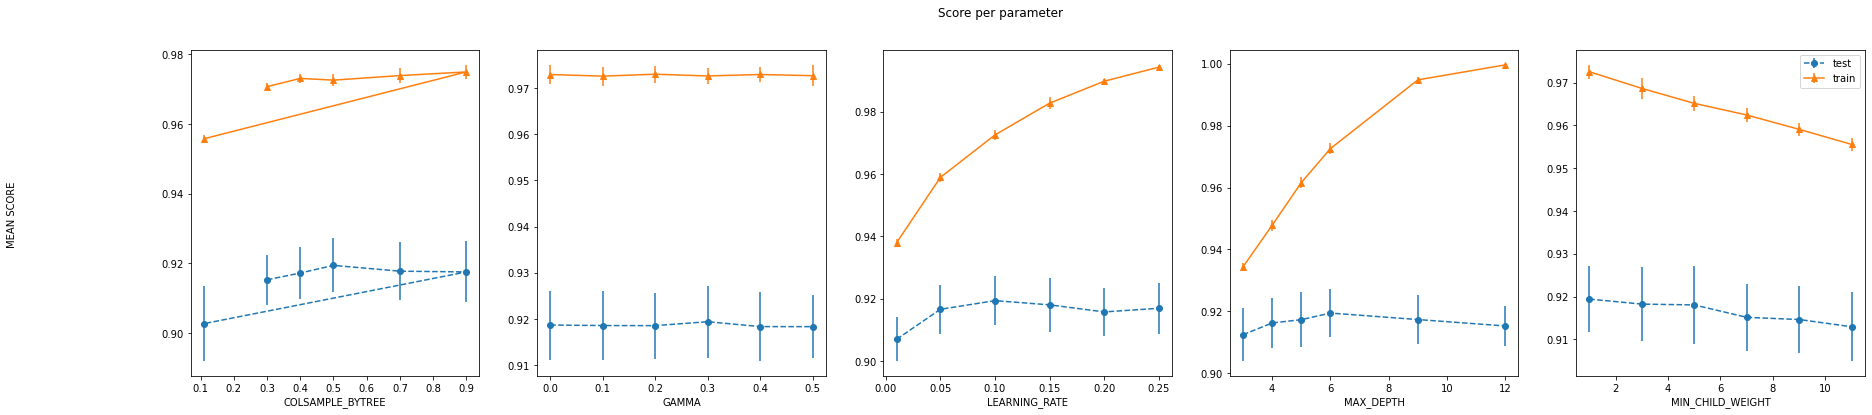

In [24]:
import matplotlib.pyplot as plt
def plot_search_results(grid):
    """
    Params: 
        grid: A trained GridSearchCV object.
    """
    ## Results from grid search
    results = grid.cv_results_
    means_test = results['mean_test_score']
    stds_test = results['std_test_score']
    means_train = results['mean_train_score']
    stds_train = results['std_train_score']

    ## Getting indexes of values per hyper-parameter
    masks=[]
    masks_names= list(grid.best_params_.keys())
    for p_k, p_v in grid.best_params_.items():
        masks.append(list(results['param_'+p_k].data==p_v))

    params=grid.param_grid

    ## Ploting results
    fig, ax = plt.subplots(1,len(params),sharex='none', sharey='none',figsize=(30,6))
    fig.suptitle('Score per parameter')
    fig.text(0.04, 0.5, 'MEAN SCORE', va='center', rotation='vertical')
    pram_preformace_in_best = {}
    for i, p in enumerate(masks_names):
        m = np.stack(masks[:i] + masks[i+1:])
        pram_preformace_in_best
        best_parms_mask = m.all(axis=0)
        best_index = np.where(best_parms_mask)[0]
        x = np.array(params[p])
        y_1 = np.array(means_test[best_index])
        e_1 = np.array(stds_test[best_index])
        y_2 = np.array(means_train[best_index])
        e_2 = np.array(stds_train[best_index])
        ax[i].errorbar(x, y_1, e_1, linestyle='--', marker='o', label='test')
        ax[i].errorbar(x, y_2, e_2, linestyle='-', marker='^',label='train' )
        ax[i].set_xlabel(p.upper())

    plt.legend()
    plt.show()
plot_search_results(grid_search)

In [24]:
from keras.preprocessing.text import Tokenizer
tokenizer = Tokenizer(num_words=5000)
tokenizer.fit_on_texts(sentences)

In [25]:
sentences_train, sentences_test, y_train, y_test = train_test_split(sentences, y, test_size=0.2, random_state=45)
X_train = tokenizer.texts_to_sequences(sentences_train)
X_test = tokenizer.texts_to_sequences(sentences_test)

In [26]:
from keras.preprocessing.sequence import pad_sequences
maxlen = 100
X_train = pad_sequences(X_train, padding='post', maxlen=maxlen)
X_test = pad_sequences(X_test, padding='post', maxlen=maxlen)

In [27]:
X_train.shape

(5238, 100)

In [28]:
from keras.models import Sequential
from keras import layers
model = Sequential()
model.add(layers.Dense(10, input_dim=input_dim, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))


In [31]:
def create_embedding_matrix(filepath, word_index, embedding_dim):
    vocab_size = len(word_index) + 1  # Adding again 1 because of reserved 0 index
    embedding_matrix = np.zeros((vocab_size, embedding_dim))

    with open(filepath) as f:
        for line in f:
            word, *vector = line.split()
            if word in word_index:
                idx = word_index[word] 
                embedding_matrix[idx] = np.array(
                    vector, dtype=np.float32)[:embedding_dim]

    return embedding_matrix

In [32]:
embedding_dim = 100
embedding_matrix = create_embedding_matrix(
    'glove/glove.6B.100d.txt',
    tokenizer.word_index, embedding_dim)

In [33]:
vocab_size = len(tokenizer.word_index) + 1

In [34]:
model = Sequential()
model.add(layers.Embedding(vocab_size, embedding_dim, input_length=maxlen))
model.add(layers.Conv1D(128, 5, activation='relu'))
model.add(layers.GlobalMaxPooling1D())
model.add(layers.Dense(10, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 100, 100)          1377000   
                                                                 
 conv1d (Conv1D)             (None, 96, 128)           64128     
                                                                 
 global_max_pooling1d (Globa  (None, 128)              0         
 lMaxPooling1D)                                                  
                                                                 
 dense_2 (Dense)             (None, 10)                1290      
                                                                 
 dense_3 (Dense)             (None, 1)                 11        
                                                                 
Total params: 1,442,429
Trainable params: 1,442,429
Non-trainable params: 0
____________________________________________

In [35]:
history = model.fit(X_train, y_train,
                    epochs=10,
                    verbose=True,
                    validation_data=(X_test, y_test),
                    batch_size=10)
loss, accuracy = model.evaluate(X_train, y_train, verbose=False)
print("Training Accuracy: {:.4f}".format(accuracy))
loss, accuracy = model.evaluate(X_test, y_test, verbose=False)
print("Testing Accuracy:  {:.4f}".format(accuracy))
plot_history(history)

Epoch 1/10


: 

: 

In [24]:
model.compile(loss='binary_crossentropy', 
               optimizer='adam', 
               metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 10)                116210    
                                                                 
 dense_1 (Dense)             (None, 1)                 11        
                                                                 
Total params: 116,221
Trainable params: 116,221
Non-trainable params: 0
_________________________________________________________________


In [25]:
history = model.fit(X_train, y_train,
                    epochs=100,
                    verbose=True,
                    validation_data=(X_test, y_test),
                    batch_size=32)

Epoch 1/100


c:\Users\cvaal\anaconda3\lib\site-packages\tensorflow\python\framework\indexed_slices.py:448: UserWarning: Converting sparse IndexedSlices(IndexedSlices(indices=Tensor("gradient_tape/sequential/dense/embedding_lookup_sparse/Reshape_1:0", shape=(None,), dtype=int32), values=Tensor("gradient_tape/sequential/dense/embedding_lookup_sparse/Reshape:0", shape=(None, 10), dtype=float32), dense_shape=Tensor("gradient_tape/sequential/dense/embedding_lookup_sparse/Cast:0", shape=(2,), dtype=int32))) to a dense Tensor of unknown shape. This may consume a large amount of memory.
  warnings.warn(


164/164 [==============================] - 3s 7ms/step - loss: 0.6250 - accuracy: 0.7289 - val_loss: 0.5273 - val_accuracy: 0.8160
Epoch 2/100
164/164 [==============================] - 1s 6ms/step - loss: 0.3986 - accuracy: 0.8921 - val_loss: 0.4124 - val_accuracy: 0.8321
Epoch 3/100
164/164 [==============================] - 1s 6ms/step - loss: 0.2470 - accuracy: 0.9414 - val_loss: 0.3695 - val_accuracy: 0.8405
Epoch 4/100
164/164 [==============================] - 1s 6ms/step - loss: 0.1617 - accuracy: 0.9704 - val_loss: 0.3560 - val_accuracy: 0.8420
Epoch 5/100
164/164 [==============================] - 1s 7ms/step - loss: 0.1108 - accuracy: 0.9845 - val_loss: 0.3569 - val_accuracy: 0.8382
Epoch 6/100
164/164 [==============================] - 1s 6ms/step - loss: 0.0782 - accuracy: 0.9914 - val_loss: 0.3625 - val_accuracy: 0.8359
Epoch 7/100
164/164 [==============================] - 1s 6ms/step - loss: 0.0568 - accuracy: 0.9952 - val_loss: 0.3713 - val_accuracy: 0.8351
Epoch 8/100

In [26]:
loss, accuracy = model.evaluate(X_train, y_train, verbose=False)
print(f"Training Accuracy: {accuracy}")
loss, accuracy = model.evaluate(X_test, y_test, verbose=False)
print(f"Testing Accuracy:  {accuracy}")

Training Accuracy: 0.9998090863227844
Testing Accuracy:  0.8122137188911438


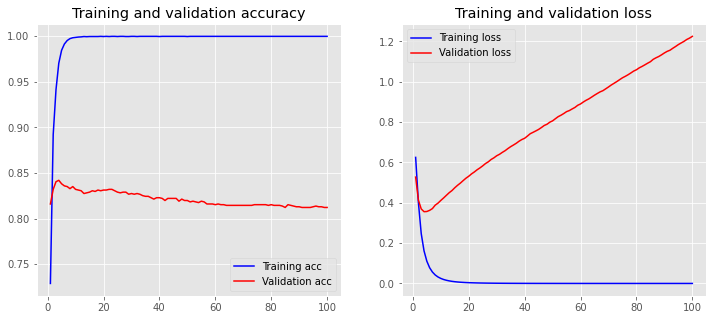

In [28]:
plot_history(history)

In [29]:
tf.keras.backend.clear_session()

In [33]:
print(sentences_train[2])

Church of England Declares ‘Jesus Is Non-Binary’


In [34]:
print(X_train[2])

[484, 4, 932, 506, 10, 1112]


In [37]:
embedding_dim = 50

model = Sequential()
model.add(layers.Embedding(input_dim=vocab_size, 
                           output_dim=embedding_dim, 
                           input_length=maxlen))
model.add(layers.GlobalMaxPool1D())
model.add(layers.Dense(10, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 100, 50)           688500    
                                                                 
 global_max_pooling1d (Globa  (None, 50)               0         
 lMaxPooling1D)                                                  
                                                                 
 dense (Dense)               (None, 10)                510       
                                                                 
 dense_1 (Dense)             (None, 1)                 11        
                                                                 
Total params: 689,021
Trainable params: 689,021
Non-trainable params: 0
_________________________________________________________________


Epoch 1/20
524/524 [==============================] - 5s 8ms/step - loss: 0.6134 - accuracy: 0.7003 - val_loss: 0.4681 - val_accuracy: 0.8023
Epoch 2/20
524/524 [==============================] - 4s 8ms/step - loss: 0.3042 - accuracy: 0.8881 - val_loss: 0.3346 - val_accuracy: 0.8534
Epoch 3/20
524/524 [==============================] - 4s 8ms/step - loss: 0.1335 - accuracy: 0.9586 - val_loss: 0.3388 - val_accuracy: 0.8603
Epoch 4/20
524/524 [==============================] - 4s 8ms/step - loss: 0.0532 - accuracy: 0.9878 - val_loss: 0.3775 - val_accuracy: 0.8466
Epoch 5/20
524/524 [==============================] - 4s 8ms/step - loss: 0.0196 - accuracy: 0.9981 - val_loss: 0.4128 - val_accuracy: 0.8389
Epoch 6/20
524/524 [==============================] - 4s 9ms/step - loss: 0.0085 - accuracy: 0.9994 - val_loss: 0.4433 - val_accuracy: 0.8389
Epoch 7/20
524/524 [==============================] - 5s 9ms/step - loss: 0.0040 - accuracy: 0.9996 - val_loss: 0.4853 - val_accuracy: 0.8435
Epoch 

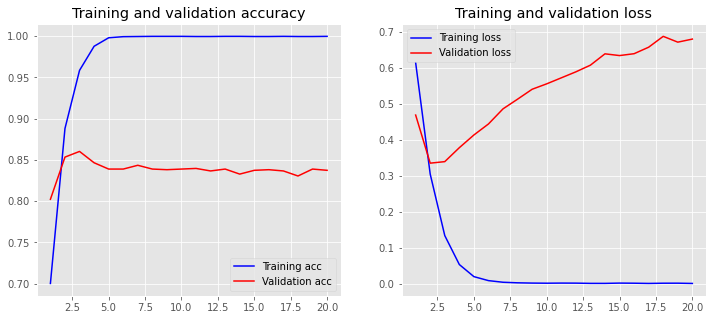

In [38]:
history = model.fit(X_train, y_train,
                    epochs=20,
                    verbose=True,
                    validation_data=(X_test, y_test),
                    batch_size=10)
loss, accuracy = model.evaluate(X_train, y_train, verbose=False)
print("Training Accuracy: {:.4f}".format(accuracy))
loss, accuracy = model.evaluate(X_test, y_test, verbose=False)
print("Testing Accuracy:  {:.4f}".format(accuracy))
plot_history(history)

In [42]:
tf.keras.backend.clear_session()

In [43]:

model = Sequential()
model.add(layers.Embedding(vocab_size, embedding_dim, 
                           weights=[embedding_matrix], 
                           input_length=maxlen, 
                           trainable=True))
model.add(layers.GlobalMaxPool1D())
model.add(layers.Dense(10, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 100, 100)          1377000   
                                                                 
 global_max_pooling1d (Globa  (None, 100)              0         
 lMaxPooling1D)                                                  
                                                                 
 dense (Dense)               (None, 10)                1010      
                                                                 
 dense_1 (Dense)             (None, 1)                 11        
                                                                 
Total params: 1,378,021
Trainable params: 1,378,021
Non-trainable params: 0
_________________________________________________________________


Epoch 1/50
524/524 [==============================] - 4s 6ms/step - loss: 0.6752 - accuracy: 0.5836 - val_loss: 0.6106 - val_accuracy: 0.7252
Epoch 2/50
524/524 [==============================] - 3s 6ms/step - loss: 0.5121 - accuracy: 0.7591 - val_loss: 0.4503 - val_accuracy: 0.7863
Epoch 3/50
524/524 [==============================] - 3s 6ms/step - loss: 0.3502 - accuracy: 0.8511 - val_loss: 0.4069 - val_accuracy: 0.8038
Epoch 4/50
524/524 [==============================] - 3s 6ms/step - loss: 0.2377 - accuracy: 0.9049 - val_loss: 0.3776 - val_accuracy: 0.8252
Epoch 5/50
524/524 [==============================] - 4s 7ms/step - loss: 0.1546 - accuracy: 0.9488 - val_loss: 0.3853 - val_accuracy: 0.8313
Epoch 6/50
524/524 [==============================] - 4s 7ms/step - loss: 0.0933 - accuracy: 0.9727 - val_loss: 0.4012 - val_accuracy: 0.8382
Epoch 7/50
524/524 [==============================] - 3s 7ms/step - loss: 0.0561 - accuracy: 0.9863 - val_loss: 0.4263 - val_accuracy: 0.8382
Epoch 

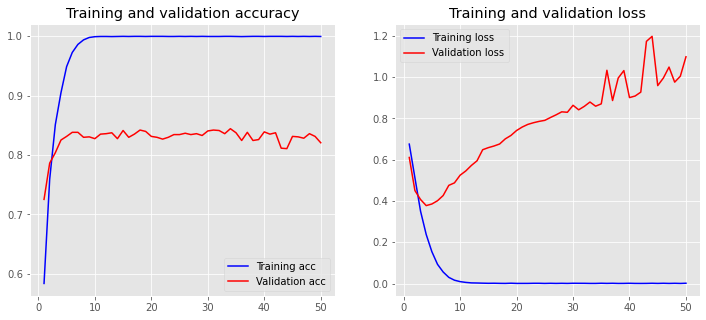

In [44]:
history = model.fit(X_train, y_train,
                    epochs=50,
                    verbose=True,
                    validation_data=(X_test, y_test),
                    batch_size=10)
loss, accuracy = model.evaluate(X_train, y_train, verbose=False)
print("Training Accuracy: {:.4f}".format(accuracy))
loss, accuracy = model.evaluate(X_test, y_test, verbose=False)
print("Testing Accuracy:  {:.4f}".format(accuracy))
plot_history(history)

In [45]:
tf.keras.backend.clear_session()